In [1]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
# Loading data
df = pd.read_csv("FuelConsumption.csv")
list(df.columns)

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [6]:
# Feature selection
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


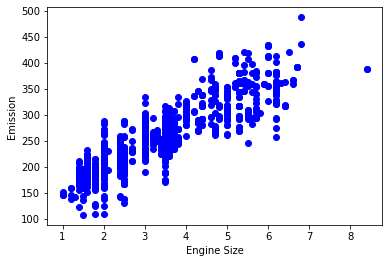

In [8]:
# Plotting Emission size with respect to the engine size
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [9]:
# Creating mutually exclusive test and train datasets
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

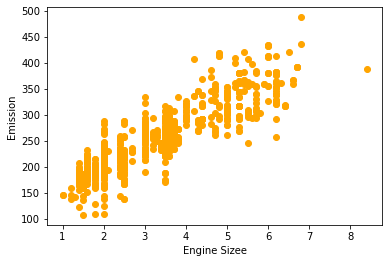

In [11]:
# Plotting train sample
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'orange')
plt.xlabel("Engine Sizee")
plt.ylabel("Emission")
plt.show()

In [12]:
# Multiple regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
# Printing coefficients
print('coefficients:', regr.coef_)

coefficients: [[10.61864002  7.89309022  9.44103274]]


In [19]:
# Prediction
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
    % np.mean((y_hat - y)**2))
# Print variances
print('variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 533.18
variance score: 0.86
